In [1]:
#!/usr/bin/python

import numpy as np
from netCDF4 import Dataset
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib as mp
import datetime
import os
import warnings
warnings.filterwarnings('ignore')

import scipy.io

import sys
sys.path.append('/home2/datahome/cdemarez/MODULES_PY') 

from tools import *

from croco_tools_cdm import *
from plot_tools import *


from scipy.ndimage.filters import gaussian_filter

In [31]:
#path a changer pour differents run


#leewa
path1 = '/home2/datawork/cdemarez/Needs/V1'
path2='/home/datawork-lops-oh/meddle/cdemarez/STAGE_M2/final_v2'
#load parameters of the simulation
h,lon,lat,mask,f,time_ini,pm,pn,angle=load_param_simulation(path1)


#smoothed
path1_s = '/home/datawork-lops-oh/meddle/cdemarez/STAGE_M2/LEEWA_smoothed/INIT/grd_partit'
path2_s = '/home/datawork-lops-oh/meddle/cdemarez/STAGE_M2/LEEWA_smoothed/final'
h_s,lon_s,lat_s,mask_s,f_s,time_ini_s,pm_s,pn_s,angle_s=load_param_simulation(path1_s)

('date du fichier ini:', datetime.date(2016, 3, 20))
('date du fichier ini:', datetime.date(2016, 3, 20))


In [21]:
depth=100
corners=[-79,30.8,-77.7,32] #for all because it fits 300m right

## Load spectra

In [2]:
pathsave_spectr='./'
pathsave_spectr_s='./'

In [4]:
def make_FFT1D(field,t,dt):
    signal=field
    FFT=np.fft.rfft(signal,signal.shape[0])
    #FFT=np.fft.fftshift(FFT)

    freq1=np.fft.rfftfreq(len(t),dt)
    #freq1=np.fft.fftshift(freq1)

    ###ATTENTION, FFTFREQ RETOURNE UNE FREQUENCE DONC 1/DX
    om=2*np.pi*freq1
    #FFT=FFT*dt
    FFT=FFT/np.sqrt(signal.shape[0])
    #PSD=FFT*np.conj(FFT)

    return FFT,om

In [ ]:
def compute_time_spectrum(kx,ky,Pw_r,Pw_i):
    dt=1*3600 #1h
    N_steps=len(Pw_r)
    Tmax=N_steps*3600  ##on met tout en seconde
    t=np.arange(0,Tmax,dt)

    skx=len(kx[0,:])
    sky=len(ky[:,0])
    som=len(np.fft.rfftfreq(len(t),dt))

    Pw=np.zeros((som,sky,skx))
    for ikx in range (skx):
        print(int(100*ikx/skx))
        for iky in range (sky):
            fft_w_r,om=make_FFT1D(Pw_r[:,iky,ikx],t,dt)
            fft_w_i,om=make_FFT1D(Pw_i[:,iky,ikx],t,dt)

            Pw[:,iky,ikx]=np.abs( (fft_w_r*np.conj(fft_w_r) + fft_w_i*np.conj(fft_w_i) )/8  \
                                   +(np.real(fft_w_i)*np.imag(fft_w_r)-np.real(fft_w_r)*np.imag(fft_w_i) )/4  )


    k=azimuthalAverage(np.sqrt(kx**2+ky**2))
    sk=len(k)

    Pw_final=np.zeros((som,sk))  
    for iom in range(som):
            Pw_final[iom,:]=azimuthalAverage(Pw[iom,:,:])
            
    return k,om,Pw_final

In [5]:
nc =Dataset(pathsave_spectr+'/fft_2d_space_w_{}.nc'.format(depth)) 

kx=nc.variables['kx'][:]
ky =nc.variables['ky'][:]
Pw_r=nc.variables['Pw_r'][:]
Pw_i=nc.variables['Pw_i'][:]
nc.close()

k,om,Pw_final=compute_time_spectrum(kx,ky,Pw_r,Pw_i)

In [12]:
nc =Dataset(pathsave_spectr_s+'/fft_2d_space_w_{}_s.nc'.format(depth)) 

kx=nc.variables['kx'][:]
ky =nc.variables['ky'][:]
Pw_r=nc.variables['Pw_r'][:]
Pw_i=nc.variables['Pw_i'][:]
nc.close()

k_s,om_s,Pw_final_s=compute_time_spectrum(kx,ky,Pw_r,Pw_i)

0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
5
5
5
5
6
6
6
6
6
7
7
7
7
7
8
8
8
8
8
9
9
9
9
9
10
10
10
10
10
11
11
11
11
12
12
12
12
12
13
13
13
13
13
14
14
14
14
14
15
15
15
15
15
16
16
16
16
17
17
17
17
17
18
18
18
18
18
19
19
19
19
19
20
20
20
20
20
21
21
21
21
21
22
22
22
22
23
23
23
23
23
24
24
24
24
24
25
25
25
25
25
26
26
26
26
26
27
27
27
27
28
28
28
28
28
29
29
29
29
29
30
30
30
30
30
31
31
31
31
31
32
32
32
32
32
33
33
33
33
34
34
34
34
34
35
35
35
35
35
36
36
36
36
36
37
37
37
37
37
38
38
38
38
39
39
39
39
39
40
40
40
40
40
41
41
41
41
41
42
42
42
42
42
43
43
43
43
43
44
44
44
44
45
45
45
45
45
46
46
46
46
46
47
47
47
47
47
48
48
48
48
48
49
49
49
49
50
50
50
50
50
51
51
51
51
51
52
52
52
52
52
53
53
53
53
53
54
54
54
54
54
55
55
55
55
56
56
56
56
56
57
57
57
57
57
58
58
58
58
58
59
59
59
59
59
60
60
60
60
60
61
61
61
61
62
62
62
62
62
63
63
63
63
63
64
64
64
64
64
65
65
65
65
65
66
66
66
66
67
67
67
67
67
68
68
68
68
68
69
69
69
69
69
70
70
70
70
70
71
71
71
71
71
72
72

## Compute spectrum of topo

In [28]:
def take_lil_i(lon,lat,var,corners_lil,dxi):
    map = Basemap(llcrnrlon=corners_lil[0],llcrnrlat=corners_lil[1],urcrnrlon=corners_lil[2],urcrnrlat=corners_lil[3],
                  resolution='c',projection='merc')
    take=(lon>corners_lil[0])&(lon<corners_lil[2])&(lat>corners_lil[1])&(lat<corners_lil[3])
    lon_lil,lat_lil,var_lil=lon[take],lat[take],var[take]
    x,y=map(lon_lil,lat_lil)
    xi=np.arange(np.min(x),np.max(x),dxi)
    yi=np.arange(np.min(y),np.max(y),dxi)
    xi,yi=np.meshgrid(xi,yi)
    
    var_lil_i=griddata((x,y),var_lil,(xi,yi),method='cubic')
    
    return xi,yi,var_lil_i 

def choose_zone(field,lon,lat,corners):
    tmp1=lon>corners[0]
    tmp2=lon<corners[2]
    tmp3=lat>corners[1]
    tmp4=lat<corners[3]

    zone=tmp1&tmp2&tmp3&tmp4
    
    
    return field[zone]

def make_square(field):
    if np.argmax(field.shape)==0:
        tmp=(field.shape)[1]
        return np.copy(field[0:tmp,:])
    elif np.argmax(field.shape)==1:
        tmp=(field.shape)[0]
        return np.copy(field[:,0:tmp])
    
def make_PSD2D(field,x,y,dx,dy):
    signal=field
    FFT=np.fft.fft2(signal,signal.shape)
    FFT=np.fft.fftshift(FFT)

    freq1=np.fft.fftfreq(len(x),dx)
    freq1=np.fft.fftshift(freq1)
    freq2=np.fft.fftfreq(len(y),dy)
    freq2=np.fft.fftshift(freq2)
    kx,ky=np.meshgrid(freq1,freq2)
    ###ATTENTION, FFTFREQ RETOURNE UNE FREQUENCE DONC 1/DX
    kx=2*np.pi*kx
    ky=2*np.pi*ky
    FFT=FFT/np.sqrt(signal.shape[0]*signal.shape[1]) #to have a correct psd, cf gula
    #FFT=FFT*dx*dy #to have a correct fft with respect to physical integration, cf theory code
    PSD=FFT*np.conj(FFT)

    return PSD,FFT,kx,ky


def detrend_han(field,sigma) :
    h_trend=gaussian_filter(np.nan_to_num(field),sigma)
    h_final=field-h_trend
    h_final=h_final*han
    return np.nan_to_num(h_final),h_trend

In [95]:
def compute_spectr_topo(lon,lat,h):

    dxi=100

    x1,y1,h1_lil=take_lil_i(lon,lat,h,corners,dxi)
    x1=make_square(x1)
    y1=make_square(y1)
    h1_lil=make_square(h1_lil)
    h1_lil=h1_lil-np.nanmean(h1_lil)


    tmphan=(np.hanning(len(x1[0,:])))
    han2d1,han2d2=np.meshgrid(tmphan,tmphan)
    han1=np.sqrt(han2d1*han2d2)
    h1_lil=h1_lil*han1


    psd2D_1,fft2D_1,ff1_1,ff2_1=make_PSD2D(np.nan_to_num(h1_lil),x1[0,:],y1[:,0],dxi,dxi)
    psd1D_1 = azimuthalAverage(psd2D_1)
    freq1D_1=azimuthalAverage(np.sqrt(ff1_1**2+ff2_1**2))
    
    return freq1D_1,psd1D_1,psd2D_1,fft2D_1,ff1_1,ff2_1

In [96]:
k_topo,psd_topo,psd2D,fft2D,ff1,ff2=compute_spectr_topo(lon,lat,h)
k_topo_s,psd_topo_s,psd2D_s,fft2D_s,ff1_s,ff2_s=compute_spectr_topo(lon_s,lat_s,h_s)

## load hcuts leewa

In [48]:
path_flt='./'

file='horizontal_cut_w_516.nc'
ncfile=path_flt+file
nc = Dataset(ncfile)
w= nc.variables['w'][0,:,:]
nc.close()
    
    
file='filt_horizontal_cut_w_516.nc'
ncfile=path_flt+file
nc = Dataset(ncfile)
w_filt= nc.variables['w_filt'][0,:,:]
nc.close()


# Plot recap and compare

saving
showing


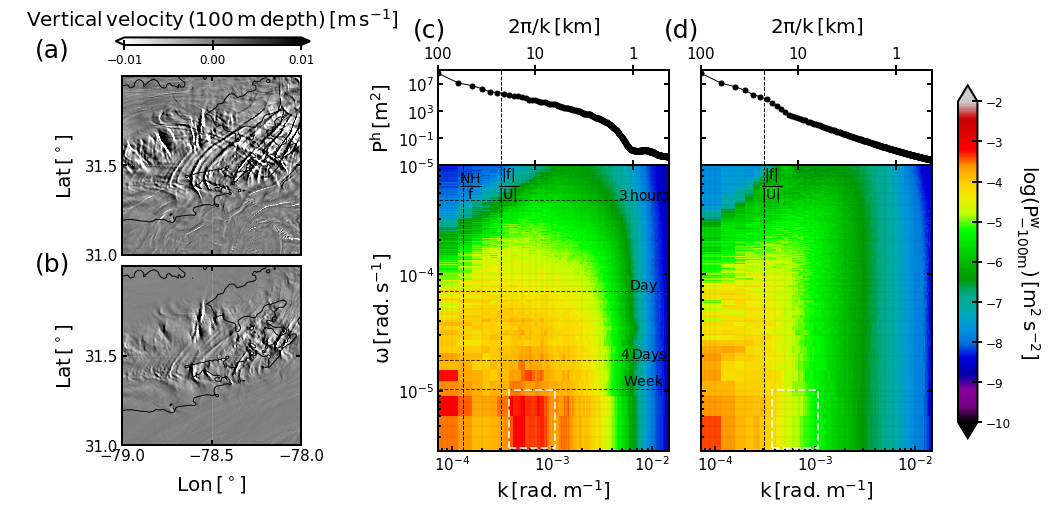

In [94]:
from matplotlib import gridspec
plt.rcParams['axes.facecolor'] = 'w'
import matplotlib.patches as patches
import matplotlib as matplotlib


corners_map=[-80,30,-77,33]
corners_lil=[-79,31,-78,32]




fig=plt.figure(figsize=(18,7))
gs = gridspec.GridSpec(8,16) 

nshow=1
rast=True
bpl3=[-0.01,0.01]


#############HCUTS############
##############################

ax=plt.subplot(gs[:4, :4],aspect='equal')
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(direction='in',width=2,length=5,bottom=1,top=1,left=1,right=1) 
plt.ylabel(r'${\rm Lat\, [^\circ]}$',fontsize=20,labelpad=10,rotation=90)
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.yticks(np.arange(31.,32,0.5),fontsize=15)
plt.xticks(np.arange(-80,-76,0.5),fontsize=15)  
plt.axis([corners_lil[0],corners_lil[2],corners_lil[1],corners_lil[3]])

pc1=plt.pcolormesh(lon[::nshow,::nshow],lat[::nshow,::nshow],
                   w[::nshow,::nshow],cmap='binary',vmin=bpl3[0],vmax=bpl3[1],rasterized=rast)
  
CS=plt.contour(lon,lat,h,np.arange(0,800,200),colors='k',linewidths=1,zorder=15,rasterized=rast)
#plt.clabel(CS, inline=1, fontsize=10,colors='k')

plt.grid(ls=':')




ax=plt.subplot(gs[4:, :4],aspect='equal')

ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(direction='in',width=2,length=5,bottom=1,top=1,left=1,right=1) 
plt.ylabel(r'${\rm Lat\, [^\circ]}$',fontsize=20,labelpad=10,rotation=90)
plt.xlabel(r'${\rm Lon\, [^\circ]}$',fontsize=20,labelpad=10,rotation=0)
plt.yticks(np.arange(31.,32,0.5),fontsize=15)
plt.xticks(np.arange(-80,-76,0.5),fontsize=15) 
plt.axis([corners_lil[0],corners_lil[2],corners_lil[1],corners_lil[3]])

pc2=plt.pcolormesh(lon[::nshow,::nshow],lat[::nshow,::nshow],
                   w_filt[::nshow,::nshow],cmap='binary',vmin=bpl3[0],vmax=bpl3[1],rasterized=rast)

 
CS=plt.contour(lon,lat,h,np.arange(0,800,200),colors='k',linewidths=1,zorder=15,rasterized=rast)
#plt.clabel(CS, inline=1, fontsize=10,colors='k')


plt.grid(ls=':')


##############################










ax=plt.subplot(gs[2:, 6:11],facecolor='white')
ax.set_xscale('log')
ax.set_yscale('log')

tmp1,tmp2=np.meshgrid(k,om)

pc=plt.pcolormesh(k,om,np.log10(Pw_final),cmap='nipy_spectral',vmin=-10,vmax=-2,rasterized=True)#,cmap='gnuplot2')#,cmap='RdBu_r')
#plt.pcolormesh(k,om,np.log10(tmp2))
#plt.colorbar()


f0=7.e-5
#plt.plot(np.array([0,1]),np.array([1,1])*(2*np.pi*f0),'-r',linewidth=2)
N0=5.e-3
#plt.plot(np.array([0,1]),np.array([1,1])*(2*np.pi*N0),'-b',linewidth=2)

#plot BT radius of deformation
H=685 #moyenne de h sur le domaine
Ro=N0*H/(f0)
x_ano=2*np.pi/Ro*1.2
plt.plot(np.array([1,1])*(2*np.pi/Ro),np.array([0,1]),'--k',linewidth=1)
t_annot=r'${\rm \frac{NH}{f}}$'
t=ax.annotate(t_annot, xy=(x_ano, (2*np.pi/(3600*3))),xycoords='data',ha='center', va='center',size=20)


#plot k min for propagating waves
x_ano=k_lee_min*1.2
plt.plot(np.array([1,1])*(k_lee_min),np.array([0,1]),'--k',linewidth=1)
t_annot=r'${\rm \frac{|f|}{|U|}}$'
t=ax.annotate(t_annot, xy=(x_ano, (2*np.pi/(3600*3))),xycoords='data',ha='center', va='center',size=20)

x_ano=np.max(k[:-150])
#4 hours
plt.plot(np.array([0,1]),np.array([1,1])*(2*np.pi/(3600*4)),'--k',linewidth=1,alpha=0.7)
t_annot=r'${\rm 3\, hours}$'
t=ax.annotate(t_annot, xy=(x_ano, (2*np.pi/(3600*3.6))),xycoords='data',ha='center', va='center',size=14)
#a day
plt.plot(np.array([0,1]),np.array([1,1])*(2*np.pi/(3600*24)),'--k',linewidth=1,alpha=0.7)
t_annot=r'${\rm Day}$'
t=ax.annotate(t_annot, xy=(x_ano, (2*np.pi/(3600*22))),xycoords='data',ha='center', va='center',size=14)
#4 days
plt.plot(np.array([0,1]),np.array([1,1])*(2*np.pi/(3600*4*24)),'--k',linewidth=1,alpha=0.7)
t_annot=r'${\rm 4 \,Days}$'
t=ax.annotate(t_annot, xy=(x_ano, (2*np.pi/(3600*(4*24-10)))),xycoords='data',ha='center', va='center',size=14)
#a week
plt.plot(np.array([0,1]),np.array([1,1])*(2*np.pi/(3600*24*7)),'--k',linewidth=1,alpha=0.7)
t_annot=r'${\rm Week}$'
t=ax.annotate(t_annot, xy=(x_ano, (2*np.pi/(3600*24*6))),xycoords='data',ha='center', va='center',size=14)
rect = patches.Rectangle((3.7e-4,3.2e-6),
                         7.e-4,7.e-6,
                         linestyle='--',lw=2,
                         edgecolor='w',fill=None,alpha=0.8,
                         zorder=15)
ax.add_patch(rect)


plt.xlabel(r'${\rm k\,[rad.m^{-1}] }$',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel(r'${\rm \omega \,[rad.s^{-1}] }$',fontsize=20)
plt.yticks(fontsize=15)

ax.set_xlim(np.min(k),np.max(k))
ax.set_ylim(np.min(om[om>0]),np.max(om))

ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(direction='in',width=2,length=5,bottom=1,top=0,left=1,right=1)

#remove minor ticks
ax.get_xaxis().set_tick_params(which='minor', direction='in',width=2,length=3,bottom=1,top=0,left=0,right=0)
ax.get_yaxis().set_tick_params(which='minor', direction='in',width=2,length=3,bottom=1,top=0,left=1,right=1)

plt.grid(True,which='both',ls=":",linewidth=0.1,color='k')



ax=plt.subplot(gs[:2, 6:11],facecolor='white')
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
plt.loglog(k_topo,psd_topo,'o-k',lw=1,ms=5)
plt.plot(np.array([1,1])*(k_lee_min),np.array([0,1e10]),'--k',linewidth=1)
ax.set_xlim(np.min(k),np.max(k))
ax.set_ylim(1e-5,1e9)
plt.yticks(fontsize=15)
plt.ylabel(r'${\rm P^h\, [m^2]}$',fontsize=20)
ax.xaxis.set_major_formatter(plt.NullFormatter())

#plt.grid(True,which='both',ls="--",linewidth=0.5,color='gray')
axy=ax.twiny()
axy.set_xscale('log')
axy.set_xlim(ax.get_xlim())
plt.xlabel(r'${\rm 2\pi/k\,[km]}$',fontsize=20,labelpad=15)
lp=np.array([1000,10000,100000])
kp=2*np.pi/lp
axy.set_xticks(kp)
axy.set_xticklabels(lp/1000) #a changer selon ce qu'on a mis dans lp
plt.xticks(fontsize=15)

axy.tick_params(direction='inout',width=2,length=10,bottom=1,top=1,left=0,right=0)
#remove minor ticks
axy.get_xaxis().set_tick_params(which='minor', size=0)
ax.get_xaxis().set_tick_params(which='minor', size=0)
ax.tick_params(direction='in',width=2,length=5,bottom=0,top=0,left=1,right=1)
#remove minor ticks








######################


ax=plt.subplot(gs[2:, 11:],facecolor='white')
ax.set_xscale('log')
ax.set_yscale('log')

tmp1,tmp2=np.meshgrid(k,om)

pc=plt.pcolormesh(k_s,om_s,np.log10(Pw_final_s),cmap='nipy_spectral',vmin=-10,vmax=-2,rasterized=True)#,cmap='gnuplot2')#,cmap='RdBu_r')
#plt.pcolormesh(k,om,np.log10(tmp2))
#plt.colorbar()

#plot k min for propagating waves
x_ano=k_lee_min*1.2
plt.plot(np.array([1,1])*(k_lee_min),np.array([0,1]),'--k',linewidth=1)
t_annot=r'${\rm \frac{|f|}{|U|}}$'
t=ax.annotate(t_annot, xy=(x_ano, (2*np.pi/(3600*3))),xycoords='data',ha='center', va='center',size=20)


'''
f0=7.e-5
#plt.plot(np.array([0,1]),np.array([1,1])*(2*np.pi*f0),'-r',linewidth=2)
N0=5.e-3
#plt.plot(np.array([0,1]),np.array([1,1])*(2*np.pi*N0),'-b',linewidth=2)

#plot BT radius of deformation
H=685 #moyenne de h sur le domaine
Ro=N0*H/(f0)
x_ano=2*np.pi/Ro*1.2
plt.plot(np.array([1,1])*(2*np.pi/Ro),np.array([0,1]),'--k',linewidth=1)
t_annot=r'${\rm \frac{NH}{f}}$'
t=ax.annotate(t_annot, xy=(x_ano, (2*np.pi/(3600*2.6))),xycoords='data',ha='center', va='center',size=20)




x_ano=np.max(k[:-150])
#4 hours
plt.plot(np.array([0,1]),np.array([1,1])*(2*np.pi/(3600*4)),'--k',linewidth=1,alpha=0.7)
t_annot=r'${\rm 3\, hours}$'
t=ax.annotate(t_annot, xy=(x_ano, (2*np.pi/(3600*3.6))),xycoords='data',ha='center', va='center',size=14)
#a day
plt.plot(np.array([0,1]),np.array([1,1])*(2*np.pi/(3600*24)),'--k',linewidth=1,alpha=0.7)
t_annot=r'${\rm Day}$'
t=ax.annotate(t_annot, xy=(x_ano, (2*np.pi/(3600*22))),xycoords='data',ha='center', va='center',size=14)
#4 days
plt.plot(np.array([0,1]),np.array([1,1])*(2*np.pi/(3600*4*24)),'--k',linewidth=1,alpha=0.7)
t_annot=r'${\rm 4 \,Days}$'
t=ax.annotate(t_annot, xy=(x_ano, (2*np.pi/(3600*(4*24-10)))),xycoords='data',ha='center', va='center',size=14)
#a week
plt.plot(np.array([0,1]),np.array([1,1])*(2*np.pi/(3600*24*7)),'--k',linewidth=1,alpha=0.7)
t_annot=r'${\rm Week}$'
t=ax.annotate(t_annot, xy=(x_ano, (2*np.pi/(3600*24*6))),xycoords='data',ha='center', va='center',size=14)
'''
rect = patches.Rectangle((3.7e-4,3.2e-6),
                         7.e-4,7.e-6,
                         linestyle='--',lw=2,
                         edgecolor='w',fill=None,alpha=0.8,
                         zorder=15)

ax.add_patch(rect)

ax.yaxis.set_major_formatter(plt.NullFormatter())
plt.xlabel(r'${\rm k\,[rad.m^{-1}] }$',fontsize=20)
plt.xticks(fontsize=15)
ax.set_xlim(np.min(k),np.max(k))
ax.set_ylim(np.min(om[om>0]),np.max(om))

ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(direction='in',width=2,length=5,bottom=1,top=0,left=1,right=1)

#remove minor ticks
ax.get_xaxis().set_tick_params(which='minor', direction='in',width=2,length=3,bottom=1,top=0,left=0,right=0)
ax.get_yaxis().set_tick_params(which='minor', direction='in',width=2,length=3,bottom=1,top=0,left=1,right=1)

plt.grid(True,which='both',ls=":",linewidth=0.1,color='k')



ax=plt.subplot(gs[:2, 11:],facecolor='white')
ax.spines['top'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
plt.loglog(k_topo_s,psd_topo_s,'o-k',lw=1,ms=5)
plt.plot(np.array([1,1])*(k_lee_min),np.array([0,1e10]),'--k',linewidth=1)
ax.set_xlim(np.min(k),np.max(k))
ax.set_ylim(1e-5,1e9)
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_major_formatter(plt.NullFormatter())

#plt.grid(True,which='both',ls="--",linewidth=0.5,color='gray')
axy=ax.twiny()
axy.set_xscale('log')
axy.set_xlim(ax.get_xlim())
plt.xlabel(r'${\rm 2\pi/k\,[km]}$',fontsize=20,labelpad=15)
lp=np.array([1000,10000,100000])
kp=2*np.pi/lp
axy.set_xticks(kp)
axy.set_xticklabels(lp/1000) #a changer selon ce qu'on a mis dans lp
plt.xticks(fontsize=15)

axy.tick_params(direction='inout',width=2,length=10,bottom=1,top=1,left=0,right=0)
#remove minor ticks
axy.get_xaxis().set_tick_params(which='minor', size=0)
ax.get_xaxis().set_tick_params(which='minor', size=0)
ax.tick_params(direction='in',width=2,length=5,bottom=0,top=0,left=1,right=1)
#remove minor ticks











cbar_ax = fig.add_axes([0.77, 0.15, 0.015, 0.7])
cbar=fig.colorbar(pc, cax=cbar_ax,extend='both',orientation='vertical')#,ticks=np.arange(0,maxE+0.1,1))
cbar.set_label(r"${\rm log(P^w_{-100m}) \,[m^2\,s^{-2}]}$", fontsize=20, 	rotation=-90,labelpad=30)
#cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.set_offset_position('left')
cbar.update_ticks()
cbar.outline.set_linewidth(2)
cbar_ax.tick_params(direction='inout',width=2,length=10,labelsize=12)




cbar_ax = fig.add_axes([0.12, 0.93, 0.15, 0.015])
cbar=fig.colorbar(pc1, cax=cbar_ax,extend='both',orientation='horizontal',ticks=[bpl3[0],0,bpl3[1]])
#cbar.set_label(r"${\rmDensisty \,[ kg.m^{-3}]}$", fontsize=15, 	rotation=0,labelpad=-55)
cbar.set_label(r"${\rm Vertical\, velocity\,(100\,m\, depth) \,[ m\,s^{-1}]}$", fontsize=20, 	rotation=0,labelpad=-60)
#cbar.formatter.set_powerlimits((0, 0))
cbar.ax.yaxis.set_offset_position('left')
cbar.update_ticks()
cbar.outline.set_linewidth(2)
cbar_ax.tick_params(direction='inout',width=2,length=10,labelsize=12)


t=plt.annotate('(a)', xy=(0.05, 0.9),
                xycoords='figure fraction',ha='center', va='center',
                size=25)

t=plt.annotate('(b)', xy=(0.05, 0.48),
                xycoords='figure fraction',ha='center', va='center',
                size=25)

t=plt.annotate('(c)', xy=(0.41, 0.94),
                xycoords='figure fraction',ha='center', va='center',
                size=25)

t=plt.annotate('(d)', xy=(0.65, 0.94),
                xycoords='figure fraction',ha='center', va='center',
                size=25)

plt.subplots_adjust(right=0.75,wspace=1.5,hspace=0)

print("saving")
plt.savefig('recap_spectrum.pdf',dpi=200,bbox_inches='tight')
print("showing")
plt.show()